In [59]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
from functions import *

## Algorithm

In [60]:
def extract_clusters(points, maxN, P_th):
    """
    points: input matrix
    maxN: maximum number of partitions to be found
    P_th: percentile threshold
    """
    
    M = points.shape[1]
    partitions = np.array([])
    Fset = np.arange(M)
    Np = 0
    T_th = np.abs(StudentDistr(points.shape[0] - 2).ppf((100 - P_th) / 200))
    while Np < maxN:
        F = Fset.copy()
        t = T_th / 2
        step = (T_th - t) / 10
        
        while True:
            if len(F) < M * (1 - P_th / 100):
                return partitions


            matrix = calc_dist(points[:, F])
            edges_list, edges_matrix = create_mst(matrix)

            S1, S2, best_edge = get_best_partition(edges_list, edges_matrix, points[:, F])
            
            if len(S1) < 2 or len(S2) < 2:
                Np += 1
                break
            
            Fnew = np.array([])

            for gene in F:
                stat, p_val = calc_t_stat(points, S1, S2, gene)
                if np.abs(stat) > t:
                    Fnew = np.append(Fnew, gene)
                        
            if (Fnew.shape[0] == 0):
                return partitions
            
            
            if (len(set(F) - set(Fnew)) == 0 and np.abs(t - T_th) < 1e-4):
                Fset = np.array(list(set(Fset) - set(Fnew))).astype(int)
                Np += 1
                break
            else:
                F = Fnew.astype(int)
                if np.abs(t - T_th) > 1e-4:
                    t += step
                
            
        if F.shape[0] != 0:
            partitions = np.append(partitions, Partition(S1, S2, F))
            
        
    return partitions



## Syntetic data

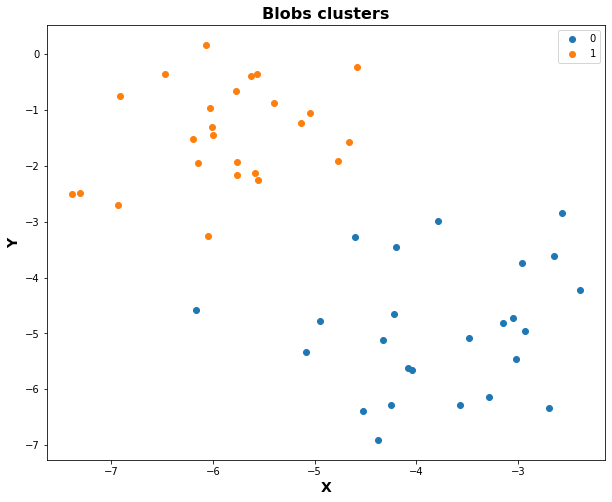

In [61]:
points, classes = make_blobs(50, 2, centers=2,  random_state=1001)

## add noise
points_noise = points.copy()
for k in range(20):
    noise = np.random.uniform(size=(points.shape[0]))
    points_noise = np.hstack((points_noise, noise.reshape(-1, 1)))

    
plt.figure(figsize=(10, 8))
plt.title('Blobs clusters', weight='bold', size=16)

for class_ in [0, 1]:
    
    plt.scatter(points[classes == class_, 0], points[classes == class_, 1], label=class_)


plt.xlabel('X', weight='bold', size=14)
plt.ylabel('Y', weight='bold', size=14)

plt.legend()

## Predicted syntetic data

In [62]:
maxN = 2
P_th = 99.5

partitions = extract_clusters(points_noise, maxN, P_th)

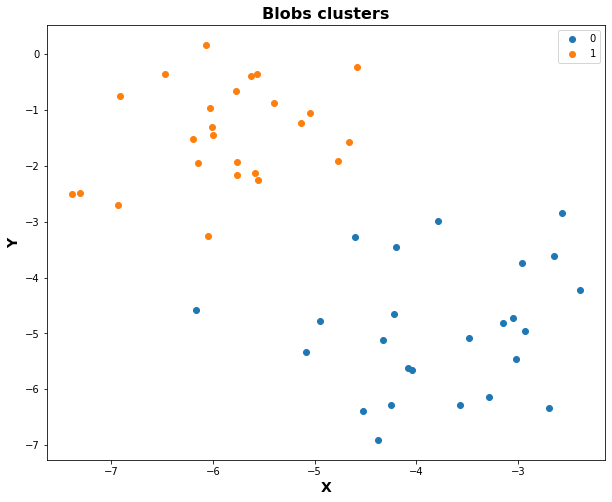

In [63]:
pred_classes = np.zeros(points.shape[0])
pred_classes[best_partition.S2] = 1

plt.figure(figsize=(10, 8))
plt.title('Blobs clusters', weight='bold', size=16)

for class_ in [0, 1]:
    
    plt.scatter(points[pred_classes == class_, 0], points[pred_classes == class_, 1], label=class_)


plt.xlabel('X', weight='bold', size=14)
plt.ylabel('Y', weight='bold', size=14)

plt.legend()